In [1]:
import numpy as np
import cv2
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
def list_img(path,filetypes):
    
    files = []    
    for filename in Path(str(path)).rglob('*.{}'.format(filetypes)):
        files.append(filename)
    return files

In [3]:
def binary_image(path, threshold):
    
    im = np.array(cv2.imread(str(path), 0))
    im = 1.0 * (im < threshold)
    
    return im    

In [4]:
def f1_score(gt,sg):
    '''
    gt dan seg harus numpy array 2d
    input harus citra biner [0, 1] 0 hitam, 1 putih
    param pertama harus ground truth image
    param kedua harus segmented image
    '''
    if (gt.shape!=sg.shape):
        return 'Size not match!'
    
    fn = (gt.ravel()>sg.ravel()).sum()
    fp = (gt.ravel()<sg.ravel()).sum()
    tn = ((gt.ravel()==0)&(sg.ravel()==0)).sum()
    tp = ((gt.ravel()==1)&(sg.ravel()==1)).sum()
              
    f1 = (2*tp)/((2*tp)+fp+fn)
              
    return f1

In [5]:
files_gt = list_img('ground_truth/', 'jpg')
files_sg = list_img('segmentation', 'png')

In [6]:
im_gt = binary_image(files_gt[0], 100)
im_sg = binary_image(files_sg[0], 100)

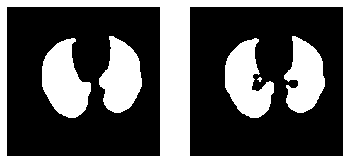

In [7]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(im_gt, cmap='binary')
ax[0].axis('off')
ax[1].imshow(im_sg, cmap='binary')
ax[1].axis('off')

plt.show()

In [8]:
f1_score(im_gt,im_sg)

0.9914217205684543